<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/17_stock_return_prediction_using_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK RETURN PREDICTIONS USING LSTM MODEL**

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


PREDICTING THE STOCK RETURN

In [4]:
## first add the column called previous close
df["PrevClose"] = df["close"].shift(1)
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [5]:
## define the return column.
df["Return"] = (df["close"] - df["PrevClose"]) / df["PrevClose"]
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<AxesSubplot:>

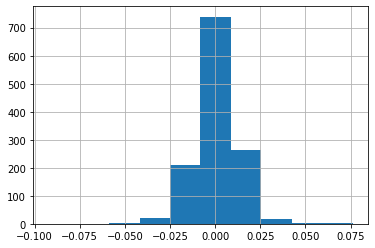

In [6]:
## histogram of the Return Column.
df["Return"].hist()

In [7]:
series = df["Return"].values[1:].reshape(-1,1)
## normalize the data
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()
print(series)

[-0.43811722  0.08061497 -0.73536414 ... -1.71332483  1.30572463
 -1.82299002]


In [8]:
## see if we can use T past values to predict the next value.
T = 10
D = 1
X = []
Y = []

## populate the X and Y lists.
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1) ## now the data should be NxTxD
Y = np.array(Y)
N = len(X)

print("X.shape :-", X.shape, "Y.shape :-", Y.shape)

X.shape :- (1248, 10, 1) Y.shape :- (1248,)


In [9]:
i = Input(shape = (T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    loss = "mse",
    optimizer = Adam(learning_rate = 0.01)
)

In [11]:
r = model.fit(
    X[:-N//2], Y[:-N//2],
    validation_data = (X[-N//2:], Y[-N//2:]),
    epochs = 100
)

Epoch 1/100
20/20 [==============================] - 3s 33ms/step - loss: 1.0016 - val_loss: 1.1415
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9918 - val_loss: 1.1528
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.9885 - val_loss: 1.1479
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.9849 - val_loss: 1.1426
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9837 - val_loss: 1.1471
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9850 - val_loss: 1.1475
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9819 - val_loss: 1.1409
Epoch 8/100
20/20 [==============================] - 0s 8ms/step - loss: 0.9837 - val_loss: 1.1410
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9827 - val_loss: 1.1462
Epoch 10/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9798 - val_loss: 1.1413
Epoch 11

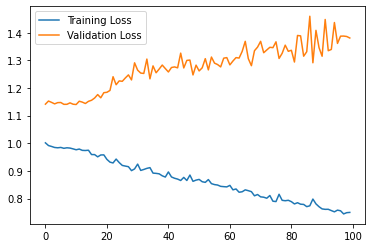

In [12]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

Here the Even though the training Loss is decreasing. The validation is not seems good. It is going up. So the model is fitting the Noise.

ONE-STEP FORECAST

39/39 [==============================] - 1s 3ms/step
(1248, 1)


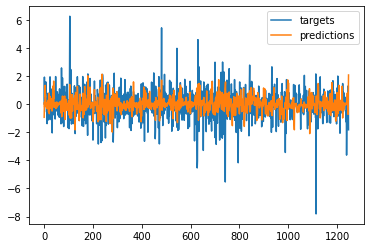

In [13]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = "targets")
plt.plot(predictions, label = "predictions")
plt.legend();
plt.show();

DOING THE MULTI-STEP FORECAST

1/1 [==============================] - 0s 18ms/step


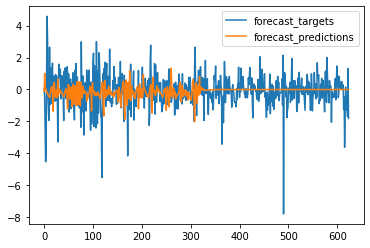

In [14]:
validation_target = Y[-N//2:]
validation_predictions = []

## last train input
last_x = X[-N//2]  ## 1D array of length T.

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  ## update the prediction list.
  validation_predictions.append(p)
  ## make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = "forecast_targets")
plt.plot(validation_predictions, label = "forecast_predictions")
plt.legend();
plt.show();

The model is trying to Predict someting but even though, The Overall model is Not doing very well.

***